In [1]:
import importlib
from matplotlib import pyplot as plt 


import calibration_metric
from calibration_metric.vis.calibration_plot import plot_df, get_df_from_file
from calibration_metric.utils.reader import MisoTopLogitFormatSequenceReader
importlib.reload(calibration_metric)

calflow_paths_and_models = [("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_calflow/1.0/t5-small-lm-adapt_calflow_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-small"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_calflow/1.0/t5-base-lm-adapt_calflow_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-base"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_calflow/1.0/t5-large-lm-adapt_calflow_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits", 
                             "T5-large"),
                            ("/brtx/604-nvme1/estengel/calflow_calibration/benchclamp/text_to_calflow/1.0/bart-base_calflow_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "BART-base"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_calflow/1.0/bart-large_calflow_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "BART-large")]

tree_dst_paths_and_models = [("/brtx/605-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/t5-small-lm-adapt_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-small"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/t5-base-lm-adapt_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-base"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/t5-large-lm-adapt_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-large"),
                            ("/brtx/604-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/bart-base_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "BART-base"),
                            ("/brtx/605-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/bart-large_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "BART-large")]

all_dfs = {"calflow": {}, "tree_dst": {}}

print("get calflow dfs")
for path, name in calflow_paths_and_models:
    df, ece = get_df_from_file(path, binning_strategy="adaptive")
    all_dfs['calflow'][name] = (df, ece)
print("get tree_dst dfs")
for path, name in tree_dst_paths_and_models:
    df, ece = get_df_from_file(path, binning_strategy="adaptive")
    all_dfs['tree_dst'][name] = (df, ece)


# df_to_plot = get_df_from_file(path_to_file, n_bins=20)
# fig = plot_df(df_to_plot)

get calflow dfs
get tree_dst dfs


KeyboardInterrupt: 

In [ ]:

miso_cf_df = get_df_from_file("/brtx/604-nvme1/estengel/calflow_calibration/miso/tune_roberta_tok_fix_benchclamp_data/translate_output/test_all.logits",
                     n_bins=20,
                     reader_cls=MisoTopLogitFormatSequenceReader,
                     binning_strategy="adaptive")

miso_td_df = get_df_from_file("/brtx/603-nvme1//estengel/calflow_calibration/tree_dst/tune_roberta//translate_output/test_all.logits",
                     n_bins=20,
                     reader_cls=MisoTopLogitFormatSequenceReader,
                     binning_strategy="adaptive")

all_dfs['calflow']['MISO'] = miso_cf_df
all_dfs['tree_dst']['MISO'] = miso_td_df

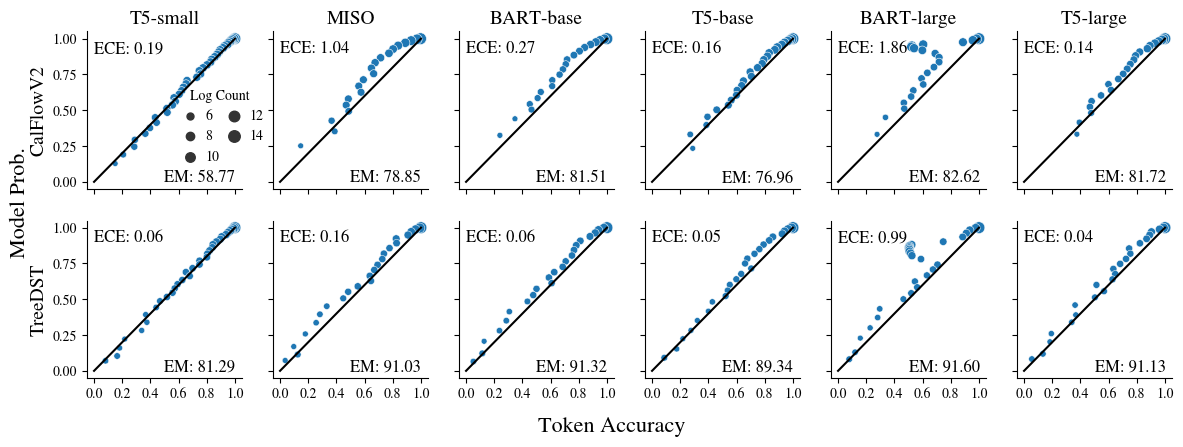

In [ ]:
from matplotlib import pyplot as plt 

plt.rcParams["font.family"] = "Nimbus Roman"
import pandas as pd 

importlib.reload(calibration_metric)
from calibration_metric.vis.calibration_plot import plot_df, get_df_from_file

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

fig, axes = plt.subplots(2, 6, figsize=(14, 4.5), sharex=True, sharey=True)


order = ["T5-small", "MISO", "BART-base", "T5-base", "BART-large", "T5-large" ]
with open("calibration_results/metrics.csv") as f:
    metric_df = pd.read_csv(f)

metric_kwargs = {"x": 0.000, "y": 0.9, "fontsize": 12, "horizontalalignment": "left"}
em_kwargs = {"x": 0.50, "y": 0.0, "fontsize": 12, "horizontalalignment": "left"}

# TODO (elias): add EM to plots 

for i, model in enumerate(order):
    try:
        cf_df_to_plot, ece = all_dfs['calflow'][model]
        plot_df(cf_df_to_plot, 
                ax=axes[0, i], 
                title=model, 
                show_legend=False, 
                metric_value=ece, 
                metric_value_kwargs=metric_kwargs,
                xlabel=None,
                ylabel="CalFlowV2")
        em_value = metric_df[metric_df['Model'].str.startswith(model)][metric_df['Dataset'] == "CalflowV2"]['EM'].values[0]
        axes[0,i].text(s=f"EM: {em_value:.2f}", **em_kwargs)
        axes[0,0].set_ylabel("CalFlowV2", fontsize=14)
        axes[0,i].set_title(model, fontsize=14)
        axes[0,i].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    except:
        pass
    try:
        td_df_to_plot, ece = all_dfs['tree_dst'][model]
        plot_df(td_df_to_plot, 
                ax=axes[1, i], 
                title=None, 
                show_legend=False, 
                metric_value=ece, 
                 metric_value_kwargs=metric_kwargs,
                 xlabel=None,
                 ylabel="TreeDST") 
        em_value = metric_df[metric_df['Model'].str.startswith(model)][metric_df['Dataset'] == "TreeDST"]['EM'].values[0]
        axes[1,0].set_ylabel("TreeDST", fontsize=14)
        axes[1,i].text(s=f"EM: {em_value:.2f}", **em_kwargs)
        axes[1,i].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

    except KeyError:
        pass

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, title="Log Count", frameon=False, bbox_to_anchor=(0.26, 0.78), handletextpad=0.1, columnspacing=0.1)

fig.text(0.07, 0.5, "Model Prob.", va='center', rotation='vertical', fontsize=16)
fig.text(0.5, -0.01, "Token Accuracy", ha='center', fontsize=16)
# fig.tight_layout()

plt.savefig("/home/estengel/papers/did-you-mean-2022/figures/all_models_calibration_plot_adaptive.pdf", bbox_inches='tight')

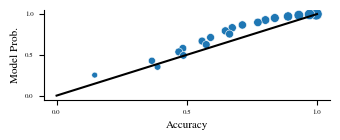

In [4]:
fig, ax = plt.subplots(1,1, figsize=(3.5, 1.5))

plot_df(miso_cf_df[0],
        ax=ax,
        title=None,
        show_legend=False, 
        metric_value=None, 
        metric_value_kwargs=metric_kwargs,
        xlabel="Accuracy",
        ylabel="Model Prob.")

ax.set_ylabel("Model Prob.", fontsize=8)
ax.set_xlabel("Accuracy", fontsize=8)
ax.set_yticks([0.0, 0.5, 1.0], labels=["0.0", "0.5", "1.0"], fontsize=5)
ax.set_xticks([0.0, 0.5, 1.0], labels=["0.0", "0.5", "1.0"], fontsize=5)
fig.tight_layout()
plt.savefig("/home/estengel/papers/did-you-mean-2022/figures/miso_calflow_calibration_plot_short_adaptive.pdf")